# Used Car Condition Prediction - Case Study

Changing working directory

In [2]:
import os

In [3]:
os.chdir('F:\Avantika University\Semester 6\ML\Data Set\Case Study\Case_study_dataset')

In [4]:
os.getcwd()

'F:\\Avantika University\\Semester 6\\ML\\Data Set\\Case Study\\Case_study_dataset'

# Importing Libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Loading the test and train data

In [6]:
car_train=pd.read_csv('train-data.csv')
car_test=pd.read_csv('test-data.csv')

In [7]:
car_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
car_train.shape

(6019, 14)

In [9]:
car_test.shape

(1234, 13)

In [10]:
car_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [11]:
car_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [12]:
car_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [13]:
car_test.Mileage.min()

'0.0 kmpl'

In [14]:
car_test.Fuel_Type.value_counts()

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64

In [15]:
#The new price column is missing in both train and test set, so we can remove it
car_train=car_train.drop('New_Price',axis=1)
car_test=car_test.drop('New_Price',axis=1)

In [16]:
car_test.shape

(1234, 12)

In [17]:
car_train.shape

(6019, 13)

In [18]:
car_train.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [19]:
car_test.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats'],
      dtype='object')

In [20]:
car_train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [21]:
car_test.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000,1223.000000
mean,616.500000,2013.400324,58507.288493,5.284546
std,356.369424,3.179700,35598.702098,0.825622
min,0.000000,1996.000000,1000.000000,2.000000
25%,308.250000,2011.000000,34000.000000,5.000000
50%,616.500000,2014.000000,54572.500000,5.000000
75%,924.750000,2016.000000,75000.000000,5.000000
max,1233.000000,2019.000000,350000.000000,10.000000


In [22]:
car_train.corr()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
Unnamed: 0,1.000000,0.002354,-0.008734,-0.010832,-0.020275
Year,0.002354,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.008734,-0.173048,1.000000,0.083113,-0.011493
Seats,-0.010832,0.012333,0.083113,1.000000,0.052225
Price,-0.020275,0.305327,-0.011493,0.052225,1.000000


In [23]:
car_test.corr()

,Unnamed: 0,Year,Kilometers_Driven,Seats
Unnamed: 0,1.000000,0.027562,-0.043032,-0.034890
Year,0.027562,1.000000,-0.455227,-0.011982
Kilometers_Driven,-0.043032,-0.455227,1.000000,0.219258
Seats,-0.034890,-0.011982,0.219258,1.000000


In [24]:
features_nan=[features for features in car_train.columns if car_train[features].isnull().sum()>=1]

In [25]:
for feature in features_nan:
    print(feature,car_train[feature].isnull().sum())

Mileage 2
Engine 36
Power 36
Seats 42


In [26]:
car_train=car_train.dropna()

In [27]:
car_train.shape

(5975, 13)

# Exploratory Data Analysis

In [28]:
car_train.nunique()

Unnamed: 0           5975
Name                 1855
Location               11
Year                   22
Kilometers_Driven    3080
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               442
Engine                145
Power                 371
Seats                   9
Price                1369
dtype: int64

Discreate Features

Mumbai        13.121339
Hyderabad     12.401674
Kochi         10.845188
Coimbatore    10.610879
Pune          10.259414
Delhi          9.188285
Kolkata        8.870293
Chennai        8.200837
Jaipur         6.861925
Bangalore      5.907950
Ahmedabad      3.732218
Name: Location, dtype: float64


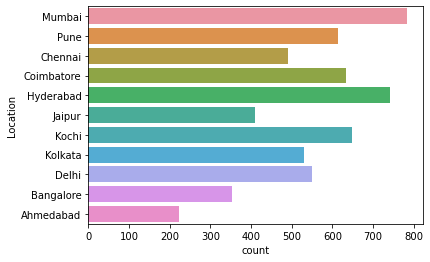

In [29]:
import seaborn as sns
sns.countplot(y='Location',data=car_train)
print(car_train.Location.value_counts(normalize=True)*100)

In [30]:
car_train.Year.value_counts()

2014    795
2015    741
2016    740
2013    648
2017    586
2012    572
2011    461
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
1998      4
2000      4
1999      2
Name: Year, dtype: int64

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64


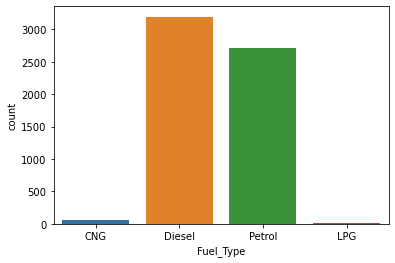

In [31]:
sns.countplot(x='Fuel_Type',data=car_train)
print(car_train.Fuel_Type.value_counts())

Manual       71.39749
Automatic    28.60251
Name: Transmission, dtype: float64


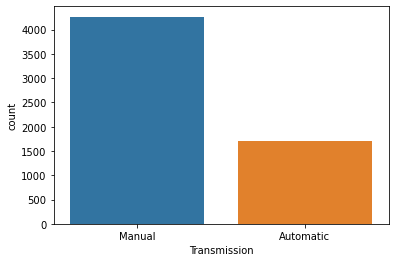

In [32]:
sns.countplot(x='Transmission',data=car_train)
print(car_train.Transmission.value_counts(normalize=True)*100)

First             82.058577
Second            15.949791
Third              1.857741
Fourth & Above     0.133891
Name: Owner_Type, dtype: float64


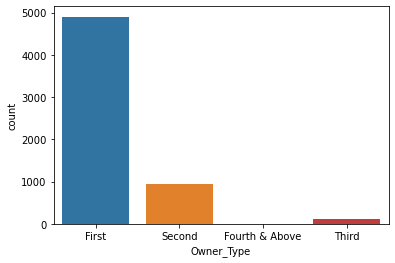

In [33]:
sns.countplot(x='Owner_Type',data=car_train)
print(car_train.Owner_Type.value_counts(normalize=True)*100)

5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64


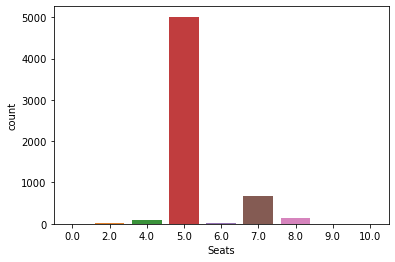

In [34]:
sns.countplot(x='Seats',data=car_train)
print(car_train.Seats.value_counts())

<AxesSubplot:xlabel='count', ylabel='Engine'>

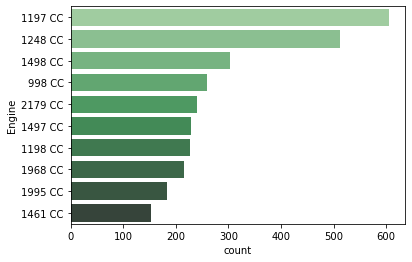

In [35]:
sns.countplot(y="Engine", data=car_train, palette="Greens_d",
              order=car_train.Engine.value_counts().iloc[:10].index)

In [36]:
car_train.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [37]:
car_train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,5975.00000,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,3008.80887,2013.386778,5.867431e+04,5.278828,9.501647
std,1739.30056,3.247238,9.155851e+04,0.808959,11.205736
min,0.00000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1502.50000,2012.000000,3.390800e+04,5.000000,3.500000
50%,3010.00000,2014.000000,5.300000e+04,5.000000,5.650000
75%,4514.50000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.00000,2019.000000,6.500000e+06,10.000000,160.000000


In [38]:
car_train.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [39]:
car_train.Power.values

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', ..., '112 bhp', '67.1 bhp',
       '57.6 bhp'], dtype=object)

In [40]:
car_train.Engine.values

array(['998 CC', '1582 CC', '1199 CC', ..., '2498 CC', '998 CC', '936 CC'],
      dtype=object)

In [41]:
print(car_train.Mileage.dtypes)
car_train.Mileage.values

object


array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', ..., '14.0 kmpl',
       '18.9 kmpl', '25.44 kmpl'], dtype=object)

For visvalisation we can add new column to the dataset based of Milage column, we can convert object datatype to numberic

In [42]:
car_train['power_n']=car_train.Power.str.extract(r'(\d+.\d+)').astype('float')
car_train['milage_n']=car_train.Mileage.str.extract(r'(\d+.\d+)').astype('float')
car_train['Engine_n']=car_train.Engine.str.extract(r'(\d+.\d+)').astype('int')
car_train['seat_n']=car_train.Seats.astype('int')

In [43]:
car_train['power_n'].values

array([ 58.16, 126.2 ,  88.7 , ..., 112.  ,  67.1 ,  57.6 ])

In [44]:
car_train['Engine_n'].values

array([ 998, 1582, 1199, ..., 2498,  998,  936])

In [45]:
car_train['milage_n'].values

array([26.6 , 19.67, 18.2 , ..., 14.  , 18.9 , 25.44])

In [46]:
car_train['seat_n'].values

array([5, 5, 5, ..., 8, 5, 5])

# Continous Features

In [47]:
features_c=['Price','Kilometers_Driven']

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


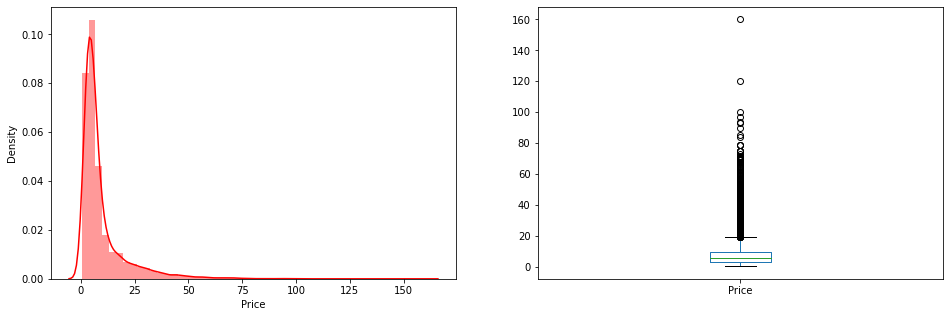

In [48]:
#price
plt.subplot(121)
sns.distplot(car_train['Price'],color="r");

plt.subplot(122)
car_train['Price'].plot.box(figsize=(16,5))

plt.show()


The price features have some outliers and its right skewed

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


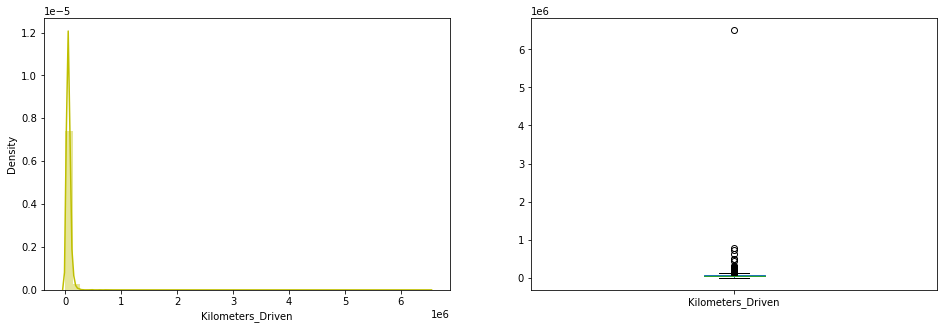

In [49]:
#Price
plt.subplot(121)
sns.distplot(car_train['Kilometers_Driven'],color="y");

plt.subplot(122)
car_train['Kilometers_Driven'].plot.box(figsize=(16,5))

plt.show()

The Kilometers_Driven features have big outliers and its right skewed

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


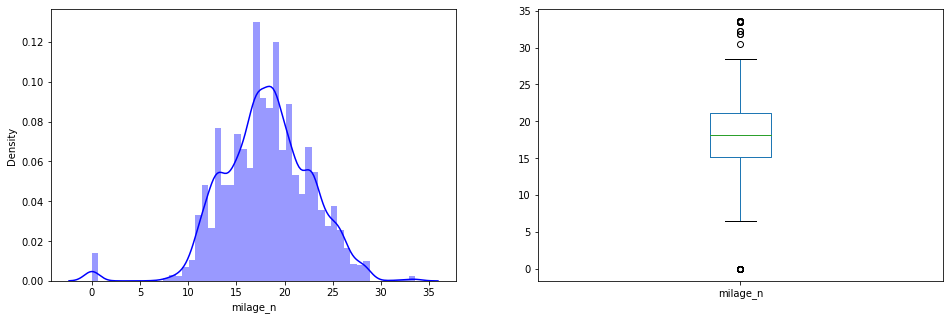

In [50]:
#milage
plt.subplot(121)
sns.distplot(car_train['milage_n'],color="b");

plt.subplot(122)
car_train['milage_n'].plot.box(figsize=(16,5))

plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


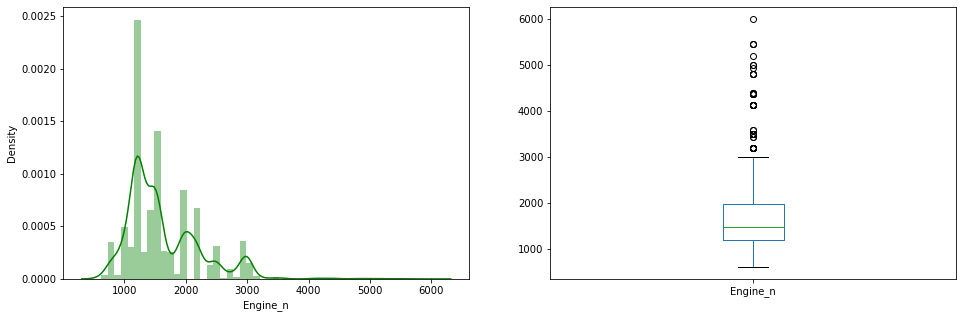

In [51]:
#engine cc
plt.subplot(121)
sns.distplot(car_train['Engine_n'],color="g");

plt.subplot(122)
car_train['Engine_n'].plot.box(figsize=(16,5))

plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


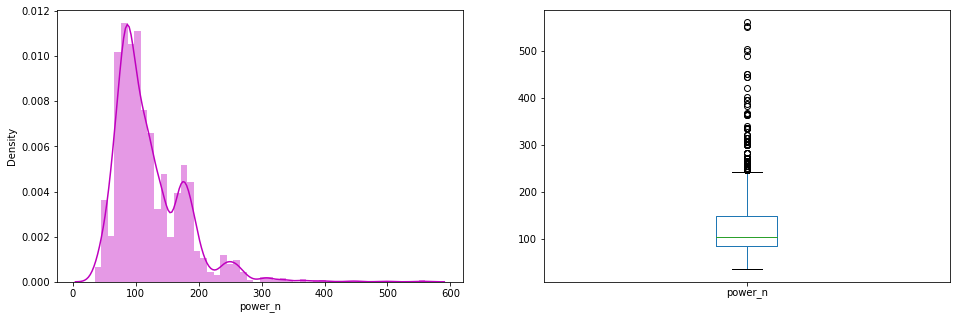

In [52]:
#power
plt.subplot(121)
sns.distplot(car_train['power_n'],color="m");

plt.subplot(122)
car_train['power_n'].plot.box(figsize=(16,5))

plt.show()

# Bivarative Analysis

<AxesSubplot:xlabel='Price', ylabel='Location'>

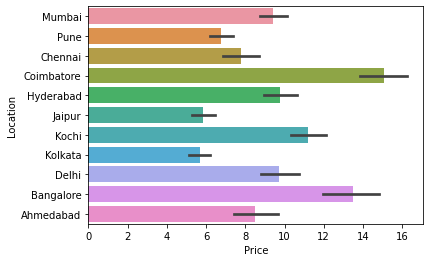

In [53]:
#location vs price

sns.barplot(y="Location", x="Price", data=car_train)

#here we are seeing the median price at each location

<AxesSubplot:xlabel='Price', ylabel='milage_n'>

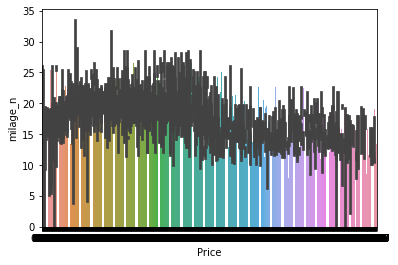

In [54]:
#Milage vs price

sns.barplot(y="milage_n", x="Price", data=car_train)

In [55]:
print(car_train.Year.dtype)
car_train.Year.values

int64


array([2010, 2015, 2011, ..., 2012, 2013, 2011], dtype=int64)

In [56]:
car_train.Year=pd.to_datetime(car_train.Year.astype('str'), format = '%Y-%m-%d')

In [57]:
car_train.Year.values

array(['2010-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', ...,
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [58]:
car_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         5975 non-null   int64         
 1   Name               5975 non-null   object        
 2   Location           5975 non-null   object        
 3   Year               5975 non-null   datetime64[ns]
 4   Kilometers_Driven  5975 non-null   int64         
 5   Fuel_Type          5975 non-null   object        
 6   Transmission       5975 non-null   object        
 7   Owner_Type         5975 non-null   object        
 8   Mileage            5975 non-null   object        
 9   Engine             5975 non-null   object        
 10  Power              5975 non-null   object        
 11  Seats              5975 non-null   float64       
 12  Price              5975 non-null   float64       
 13  power_n            4914 non-null   float64       
 14  milage_n

In [59]:
b= pd.pivot_table(car_train, values = 'Power', index = 'Year', aggfunc = 'count')
b.head(5)
#these is the count of cars

,Power
Year,
1998-01-01,4
1999-01-01,2
2000-01-01,4
2001-01-01,7
2002-01-01,14


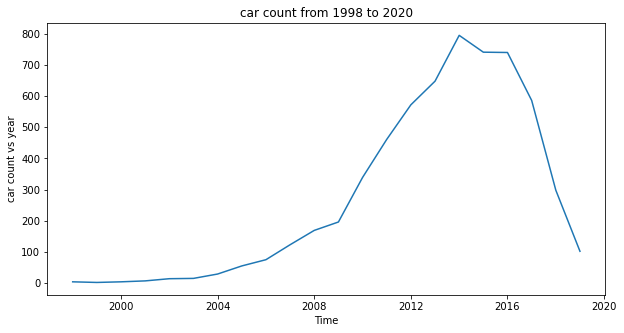

In [60]:
from matplotlib.dates import DateFormatter
timeline = b.index
graph = b['Power']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.title('car count from 1998 to 2020')
plt.xlabel('Time')
plt.ylabel('car count vs year')

plt.show()

In [61]:
a = pd.pivot_table(car_train, values = 'Price', index = 'Year', aggfunc = 'median')
a.head(5)

,Price
Year,
1998-01-01,0.690
1999-01-01,0.835
2000-01-01,1.100
2001-01-01,1.000
2002-01-01,1.100


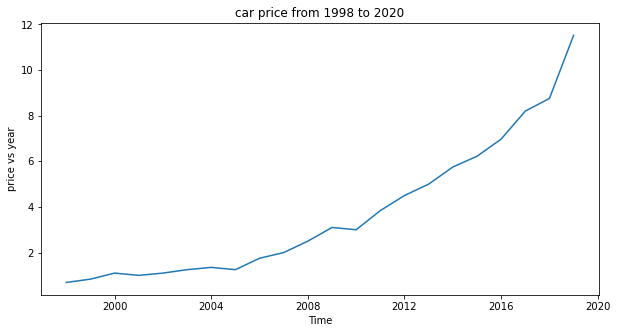

In [62]:
from matplotlib.dates import DateFormatter
timeline = a.index
graph = a['Price']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.title('car price from 1998 to 2020')
plt.xlabel('Time')
plt.ylabel('price vs year')

plt.show()

It is been clear from the above grapg that as year goes the car price increases

<AxesSubplot:xlabel='Price', ylabel='Fuel_Type'>

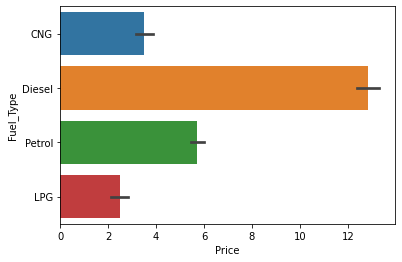

In [63]:
# fuel type vs price
sns.barplot(y="Fuel_Type", x="Price", data=car_train)

<AxesSubplot:xlabel='Price', ylabel='Transmission'>

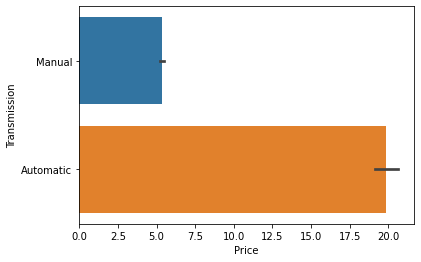

In [64]:
#Transmission vs Price
sns.barplot(y="Transmission", x="Price", data=car_train)

<AxesSubplot:xlabel='Price', ylabel='Owner_Type'>

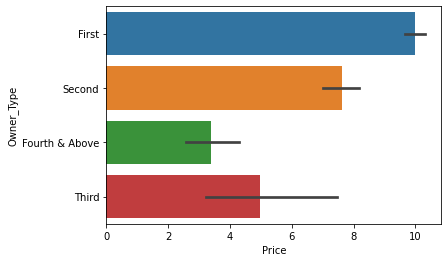

In [65]:
#Owner_Type vs price
sns.barplot(y="Owner_Type", x="Price", data=car_train)

5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64


<AxesSubplot:xlabel='Seats', ylabel='Price'>

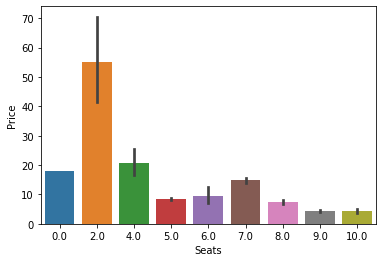

In [66]:
print(car_train.Seats.value_counts())
sns.barplot(x='Seats',y='Price',data=car_train)

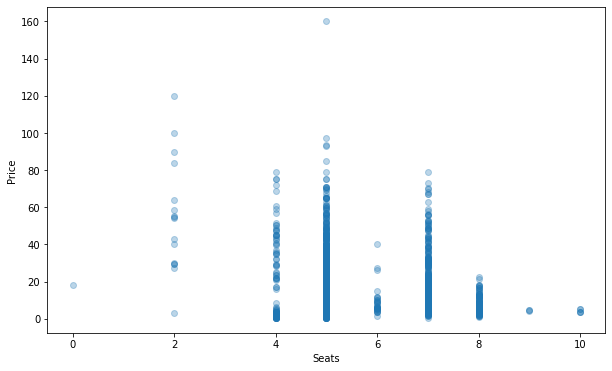

In [67]:
plt.figure(figsize=(10,6))
data=car_train.copy()
plt.scatter(data['Seats'],data['Price'],alpha=0.3)
plt.xlabel(feature)
plt.ylabel('Price')
plt.show()

In [68]:
#milage vs price
car_train.loc[car_train.Mileage=='0.0 kmpl']

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,power_n,milage_n,Engine_n,seat_n
14,14,Land Rover Freelander 2 TD4 SE,Pune,2012-01-01,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50,115.00,0.0,2179,5
67,67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019-01-01,15369,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,35.67,194.00,0.0,1950,5
79,79,Hyundai Santro Xing XL,Hyderabad,2005-01-01,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30,NaN,0.0,1086,5
262,262,Hyundai Santro Xing XL,Hyderabad,2006-01-01,99000,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.75,NaN,0.0,1086,5
307,307,Hyundai Santro Xing XL,Chennai,2006-01-01,58000,Petrol,Manual,Second,0.0 kmpl,1086 CC,null bhp,5.0,1.50,NaN,0.0,1086,5
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010-01-01,42021,Diesel,Manual,First,0.0 kmpl,1968 CC,null bhp,5.0,5.45,NaN,0.0,1968,5
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012-01-01,50243,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,3.35,NaN,0.0,1086,5
544,544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019-01-01,13190,Petrol,Automatic,First,0.0 kmpl,1950 CC,181.43 bhp,5.0,38.99,181.43,0.0,1950,5
631,631,Hyundai Santro LS zipPlus,Chennai,2002-01-01,70000,Petrol,Manual,Third,0.0 kmpl,1086 CC,null bhp,5.0,0.65,NaN,0.0,1086,5
647,647,Hyundai Santro Xing XP,Jaipur,2004-01-01,200000,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,0.80,NaN,0.0,1086,5


# Outliers

In [69]:
features_ch=['Kilometers_Driven','Price','power_n','milage_n','Engine_n']

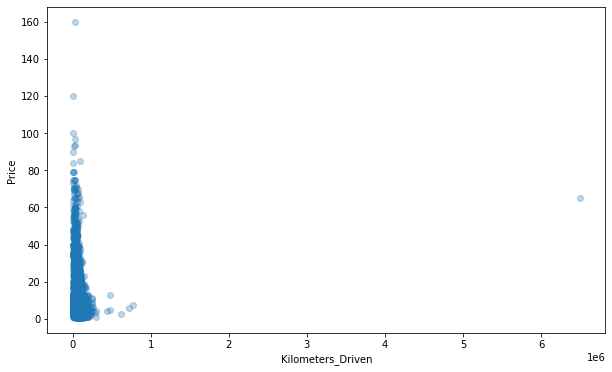

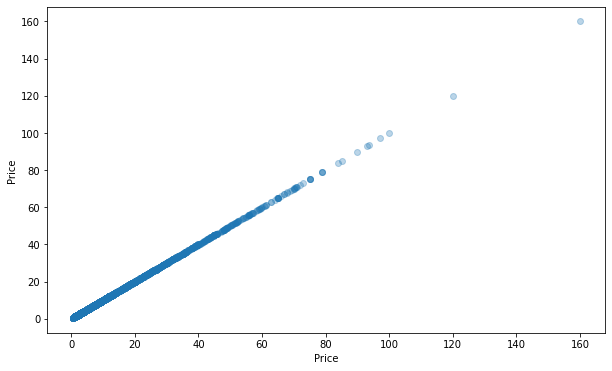

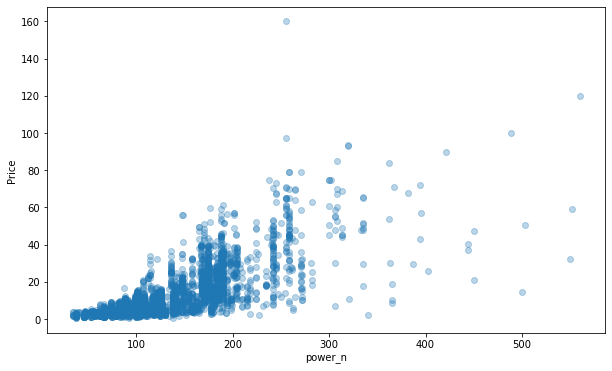

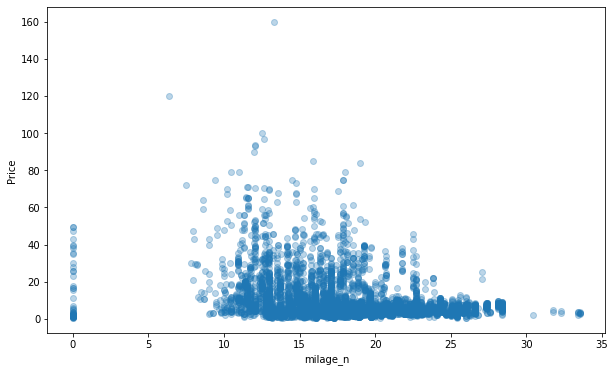

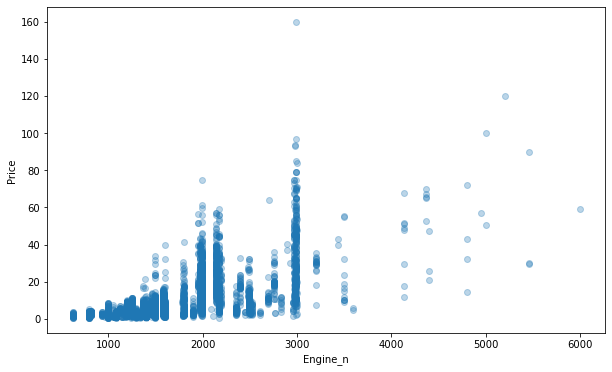

In [70]:
for feature in features_ch:
        plt.figure(figsize=(10,6))
    
        data=car_train.copy()
        plt.scatter(data[feature],data['Price'],alpha=0.3)
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.show()

In [71]:
for feature in features_ch:
    print(feature)
    print('max threshold :',car_train[feature].quantile(0.999))
    print('min threshold :',car_train[feature].quantile(0.001))

Kilometers_Driven
max threshold : 445910.00000002625
min threshold : 1000.0
Price
max threshold : 90.07800000000225
min threshold : 0.5097400000000001
power_n
max threshold : 489.1353000000053
min threshold : 34.2
milage_n
max threshold : 33.44
min threshold : 0.0
Engine_n
max threshold : 5000.0
min threshold : 624.0


In [72]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [73]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    """

    def fit (self,X,y=None):
        return self
    
    
    def transform(self,X,y=None):
        X=X[X['Kilometers_Driven']< 262000] 
            
        X=X[X['Price']<=100]
        
        X=X[X['power_n']<= 530]
        
        X=X[X['Engine_n']<= 5900 ]
        
        return X

In [74]:
data1=RemoveOutliers().fit_transform(car_train)

In [75]:
for feature in features_ch:
    print(feature)
    print('max threshold :',data1[feature].max())
    print('min threshold :',data1[feature].min())

Kilometers_Driven
max threshold : 255000
min threshold : 171
Price
max threshold : 100.0
min threshold : 0.53
power_n
max threshold : 503.0
min threshold : 34.2
milage_n
max threshold : 33.54
min threshold : 0.0
Engine_n
max threshold : 5461
min threshold : 624


In [76]:
car_train.shape

(5975, 17)

In [77]:
data1.shape

(4900, 17)

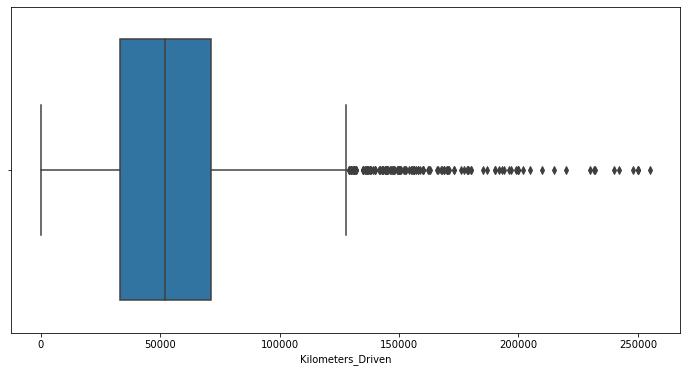

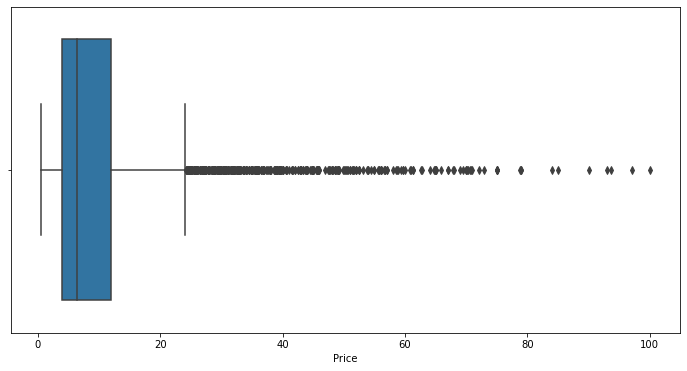

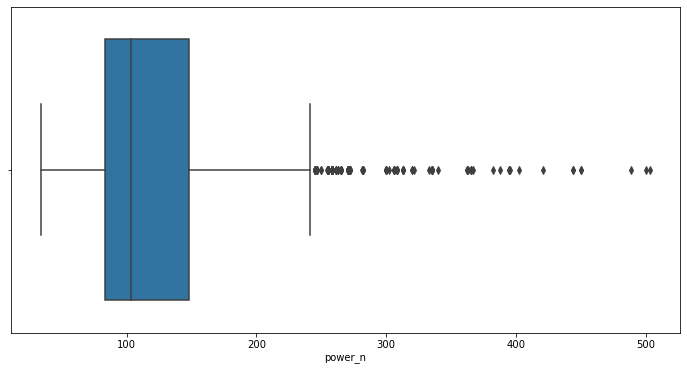

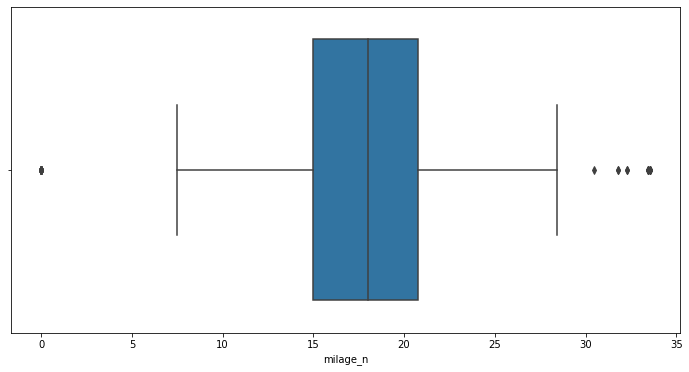

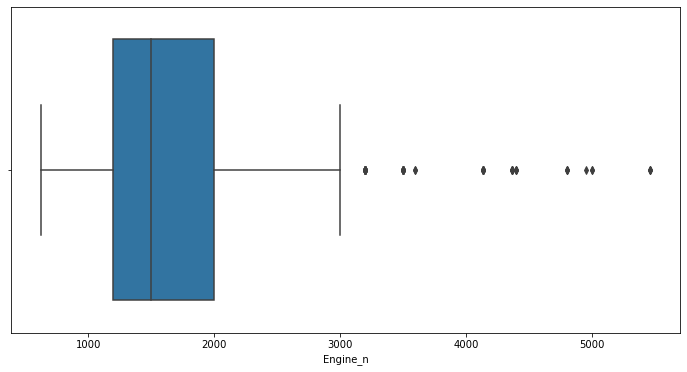

In [78]:
for i in features_ch:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=data1,ax=ax)

In [79]:
car_train.shape

(5975, 17)

# Transforming skewed features

array([[<AxesSubplot:title={'center':'Kilometers_Driven'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'power_n'}>,
        <AxesSubplot:title={'center':'milage_n'}>],
       [<AxesSubplot:title={'center':'Engine_n'}>, <AxesSubplot:>]],
      dtype=object)

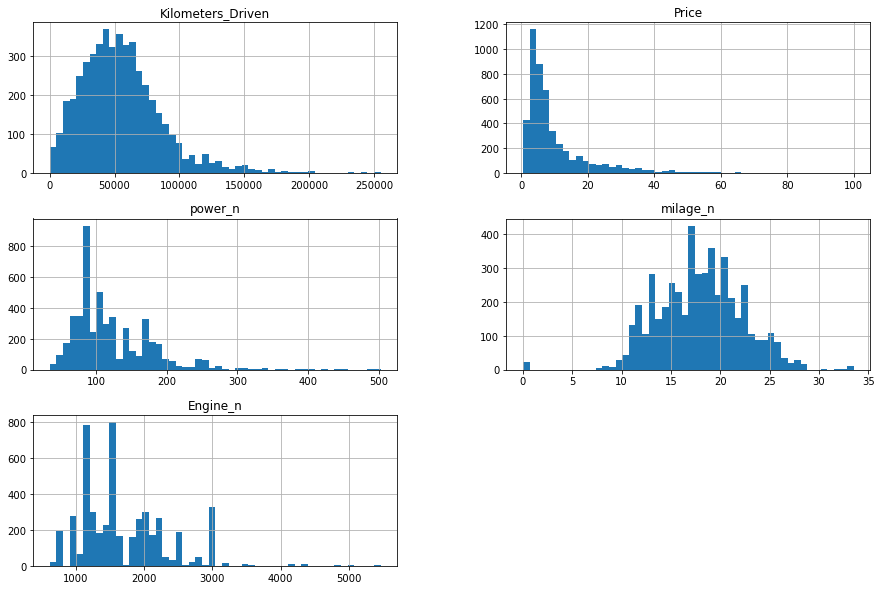

In [80]:
data1[features_ch].hist(bins=50,figsize=(15,10))

In [81]:
skewness=[]
for i in features_ch:
    skewness.append(data1[i].skew())
pd.DataFrame(data=skewness,index=features_ch,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
Price,2.715032
power_n,1.568177
Kilometers_Driven,1.378061
Engine_n,1.149291
milage_n,-0.061443


In [82]:
data_labels=data1['Price']
data2=data1.drop('Price',axis=1)

In [83]:
data1['Kilometers_Driven'].values

array([72000, 41000, 46000, ..., 55000, 46000, 47000], dtype=int64)

In [84]:
from scipy.special import boxcox1p

Transformation of skewed features

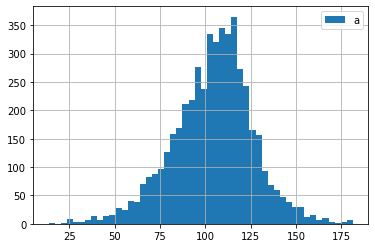

In [85]:
data1['Kilometers_Driven'].apply(lambda x: boxcox1p(x,0.33) ).hist(bins=50,label='a')
plt.legend()

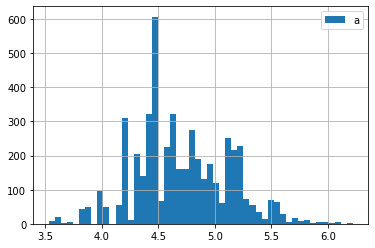

In [86]:
data1['power_n'].apply(lambda x: np.log(x) ).hist(bins=50,label='a')
plt.legend()

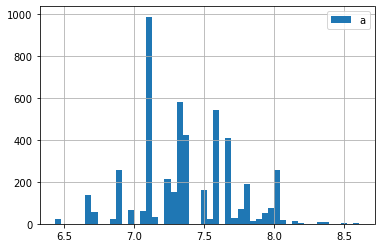

In [87]:
data1['Engine_n'].apply(lambda x: np.log(x) ).hist(bins=50,label='a')
plt.legend()

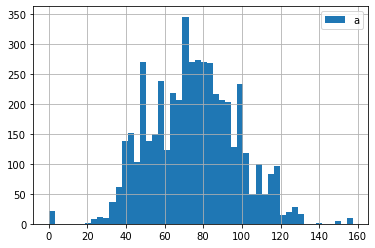

In [88]:
data1['milage_n'].apply(lambda x: np.log1p(x)**4).hist(bins=50,label='a')
plt.legend()

In [89]:
class FeaturesTransformer(BaseEstimator,TransformerMixin):
    """This class trnsforms numberical featuress in the dataset.
       Transformations are hard coded.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        import numpy as np
        from scipy.special import boxcox1p        
        X['Kilometers_Driven']=X['Kilometers_Driven'].apply(lambda x: boxcox1p(x,0.33))
        
        X['power_n']=X['power_n'].apply(lambda x:np.log(x) )
        
        X['Engine_n']=X['Engine_n'].apply(lambda x: np.log(x))
        
        X['milage_n']=X['milage_n'].apply(lambda x: np.log1p(x)**4)
        
        return X

In [90]:
data2=FeaturesTransformer().fit_transform(data1)

In [91]:
features_ch
features_c=['Kilometers_Driven', 'power_n', 'milage_n', 'Engine_n']

array([[<AxesSubplot:title={'center':'Kilometers_Driven'}>,
        <AxesSubplot:title={'center':'power_n'}>],
       [<AxesSubplot:title={'center':'milage_n'}>,
        <AxesSubplot:title={'center':'Engine_n'}>]], dtype=object)

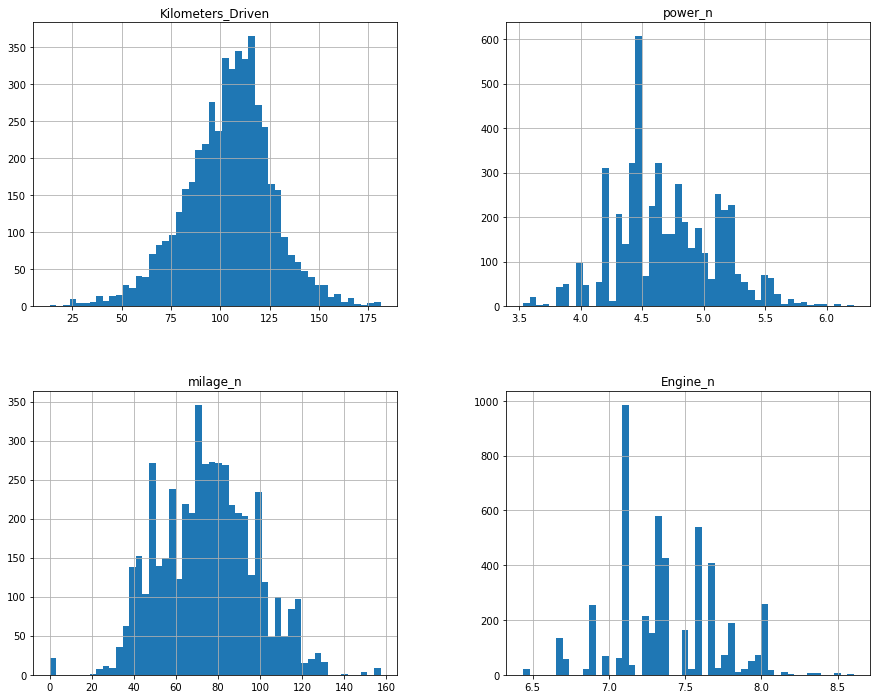

In [92]:
data2[features_c].hist(bins=50,figsize=(15,12))

# Droping unwanted columns

In [93]:
data3=data2.drop(['Name','Mileage','Engine','Power','Seats'],axis=1)

In [94]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         4900 non-null   int64         
 1   Name               4900 non-null   object        
 2   Location           4900 non-null   object        
 3   Year               4900 non-null   datetime64[ns]
 4   Kilometers_Driven  4900 non-null   float64       
 5   Fuel_Type          4900 non-null   object        
 6   Transmission       4900 non-null   object        
 7   Owner_Type         4900 non-null   object        
 8   Mileage            4900 non-null   object        
 9   Engine             4900 non-null   object        
 10  Power              4900 non-null   object        
 11  Seats              4900 non-null   float64       
 12  Price              4900 non-null   float64       
 13  power_n            4900 non-null   float64       
 14  milage_n

Lets change the datatype of year to int

In [95]:
data3['Year']=data3.Year.dt.year

In [96]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4900 non-null   int64  
 1   Location           4900 non-null   object 
 2   Year               4900 non-null   int64  
 3   Kilometers_Driven  4900 non-null   float64
 4   Fuel_Type          4900 non-null   object 
 5   Transmission       4900 non-null   object 
 6   Owner_Type         4900 non-null   object 
 7   Price              4900 non-null   float64
 8   power_n            4900 non-null   float64
 9   milage_n           4900 non-null   float64
 10  Engine_n           4900 non-null   float64
 11  seat_n             4900 non-null   int32  
dtypes: float64(5), int32(1), int64(2), object(4)
memory usage: 478.5+ KB


ordinal categorical data

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

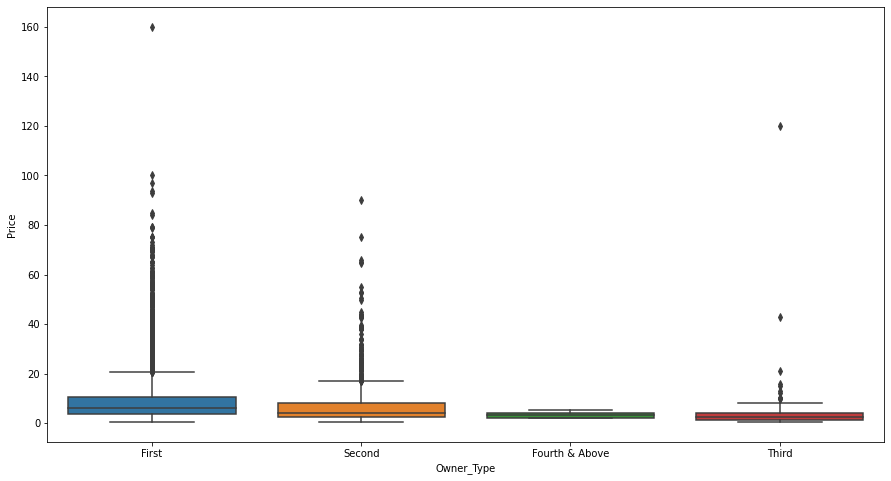

In [97]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y="Price", x="Owner_Type", data=car_train )

In [98]:
data3.Owner_Type.value_counts()

First             4076
Second             751
Third               70
Fourth & Above       3
Name: Owner_Type, dtype: int64

In [99]:
data3.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

# Getting dummy categorical variables

In [100]:
data3.columns

Index(['Unnamed: 0', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Price', 'power_n', 'milage_n',
       'Engine_n', 'seat_n'],
      dtype='object')

In [101]:
#as Transmission  is an nominal varible lets perform onehotencoding
Transmission = data3[["Transmission"]]

Transmission = pd.get_dummies(Transmission,drop_first=True)

Transmission.head()

# Location
location = data3[["Location"]]

location = pd.get_dummies(location,drop_first=True)

location.head()

#fuel_type

Fuel_Type = data3[["Fuel_Type"]]

Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=True)

Fuel_Type.head()



,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [102]:
#Concatenate dataframe >data3+ company + Location +  Transmission + Fuel_Type

data_train = pd.concat([data3 ,location ,Transmission,Fuel_Type ], axis = 1)

In [103]:
data_train.head(3)

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price,power_n,milage_n,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,Mumbai,2010,118.422565,CNG,Manual,1,1.75,4.063198,121.173895,...,0,0,0,0,1,0,1,0,0,0
1,1,Pune,2015,97.827204,Diesel,Manual,1,12.50,4.837868,84.142516,...,0,0,0,0,0,1,1,1,0,0
2,2,Chennai,2011,101.730606,Petrol,Manual,1,4.50,4.485260,76.239001,...,0,0,0,0,0,0,1,0,0,1


In [104]:
data_train.drop(['Location','Fuel_Type','Transmission'],axis=1 , inplace = True)

In [105]:
data_train.shape

(4900, 23)

# Feature Scaling

In [106]:
features_c

['Kilometers_Driven', 'power_n', 'milage_n', 'Engine_n']

In [107]:
scaled_features = data_train.copy()

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
col_names = ['Kilometers_Driven','power_n','milage_n','Engine_n']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [110]:
scaled_features[col_names] = features
#print(scaled_features)

In [111]:
scaled_features.head(2)

,Unnamed: 0,Year,Kilometers_Driven,Owner_Type,Price,power_n,milage_n,Engine_n,seat_n,Location_Bangalore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,2010,0.641616,1,1.75,-1.541884,2.034639,-1.354647,5,0,...,0,0,0,0,1,0,1,0,0,0
1,1,2015,-0.288928,1,12.50,0.323319,0.399417,-0.023337,5,0,...,0,0,0,0,0,1,1,1,0,0


array([[<AxesSubplot:title={'center':'Kilometers_Driven'}>,
        <AxesSubplot:title={'center':'power_n'}>],
       [<AxesSubplot:title={'center':'milage_n'}>,
        <AxesSubplot:title={'center':'Engine_n'}>]], dtype=object)

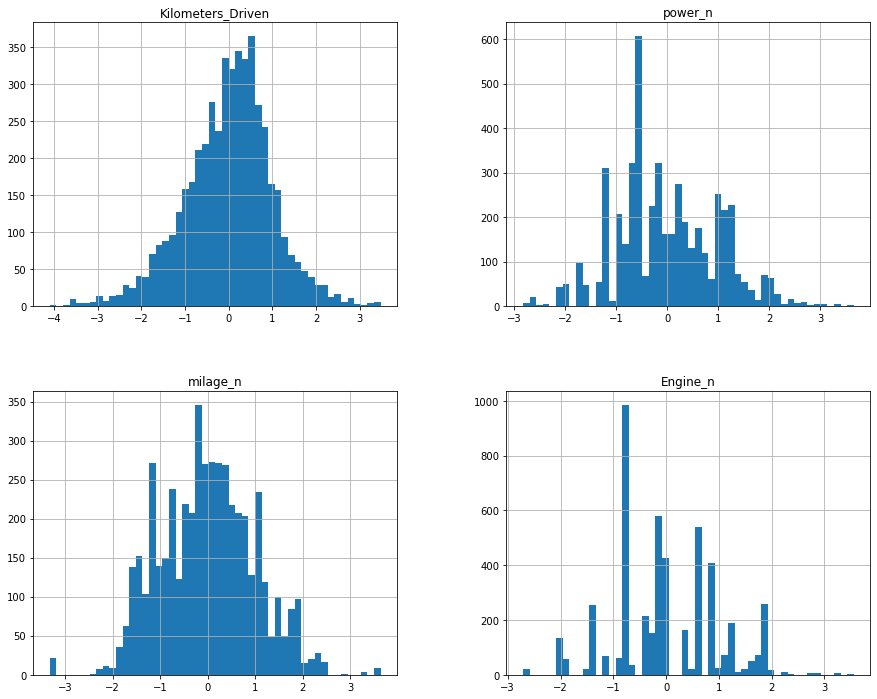

In [112]:
scaled_features[features_c].hist(bins=50,figsize=(15,12))

Done with training dataset

# Test Data

In [113]:
car_test=pd.read_csv('test-data.csv')
car_test=car_test.drop('New_Price',axis=1)
#there is null values in the power column as null bhp
#car_test.replace({'null bhp':'missing'}, inplace =True)
car_test=car_test.dropna()

In [114]:
car_test.drop(car_test.index[car_test['Power'] == 'null bhp'], inplace = True)

In [115]:
car_test['power_n']=car_test.Power.str.extract(r'(\d+)').astype('float')


    
car_test['milage_n']=car_test.Mileage.str.extract(r'(\d+.\d+)').astype('float')
    
car_test['Engine_n']=car_test.Engine.str.extract(r'(\d+.\d+)').astype('int')

car_test['seat_n']=car_test.Seats.astype('int')

In [116]:
car_test.drop(['Mileage','Engine','Power','Seats','Unnamed: 0'],axis=1 , inplace = True)

In [117]:
part =car_test['Name'].str.partition()
car_test['company'] = part[0]
car_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,power_n,milage_n,Engine_n,seat_n,company
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,58.0,32.26,998,4,Maruti
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,47.0,24.70,796,5,Maruti
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,147.0,13.68,2393,7,Toyota
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,82.0,18.50,1197,5,Hyundai
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,140.0,16.00,2179,7,Mahindra


In [118]:
car_test.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

In [119]:
car_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1201 non-null   object 
 1   Location           1201 non-null   object 
 2   Year               1201 non-null   int64  
 3   Kilometers_Driven  1201 non-null   int64  
 4   Fuel_Type          1201 non-null   object 
 5   Transmission       1201 non-null   object 
 6   Owner_Type         1201 non-null   int64  
 7   power_n            1201 non-null   float64
 8   milage_n           1201 non-null   float64
 9   Engine_n           1201 non-null   int32  
 10  seat_n             1201 non-null   int32  
 11  company            1201 non-null   object 
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 112.6+ KB


In [120]:
#as Transmission  is an nominal varible lets perform onehotencoding
Transmission = car_test[["Transmission"]]

Transmission = pd.get_dummies(Transmission,drop_first=True)


# Location
location = car_test[["Location"]]

location = pd.get_dummies(location,drop_first=True)


#fuel_type

Fuel_Type = car_test[["Fuel_Type"]]

Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=True)

In [121]:
data_test = pd.concat([car_test ,location ,Transmission,Fuel_Type ], axis = 1)


In [122]:
data_test .drop(['Transmission','Location','company','Fuel_Type','Name'],axis=1 , inplace = True)

In [123]:
data_test .shape

(1201, 21)

In [124]:
scaled_features.shape

(4900, 23)

# Model Training

In [125]:
y=scaled_features['Price']
X=scaled_features.drop('Price',axis=1)

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# Linear Regression 

In [127]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train)*100,"%")
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test)*100,"%")

Accuracy on Traing set:  66.48679499628179 %
Accuracy on Testing set:  67.8906639583188 %


# RandonForest

In [128]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred= reg_rf.predict(X_test)
print("Accuracy on Traing set: ",reg_rf.score(X_train,y_train)*100,"%")
print("Accuracy on Testing set: ",reg_rf.score(X_test,y_test)*100,"%")

Accuracy on Traing set:  98.58226128836158 %
Accuracy on Testing set:  86.73912912305634 %


In [129]:
y_pred = reg_rf.predict(X_test)

In [136]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred)*100, '%')

		Error Table
Mean Absolute Error      :  1.8073331632653065
Mean Squared  Error      :  16.781610776030604
Root Mean Squared  Error :  4.09653643655596
R Squared Error          :  86.73912912305634 %


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


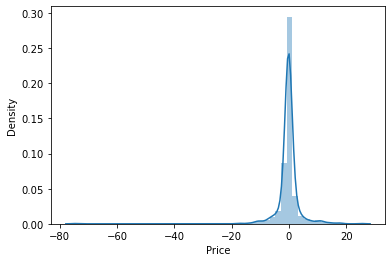

In [131]:
sns.distplot(y_test-y_pred)
plt.show()

In [132]:
from sklearn import metrics
y_pred = reg_rf.predict(X_test)
print('Accuracy Score:')
print(metrics.r2_score(y_test, y_pred)*100,"%")

Accuracy Score:
86.73912912305634 %


In [133]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred)*100, "%")

print("Accuracy on Traing set: ",reg_rf.score(X_train,y_train)*100, "%")

MAE: 1.8073331632653065
MSE: 16.781610776030604
RMSE: 4.09653643655596
R Squared Error          :  86.73912912305634 %
Accuracy on Traing set:  98.58226128836158 %


Text(0, 0.5, 'Y')

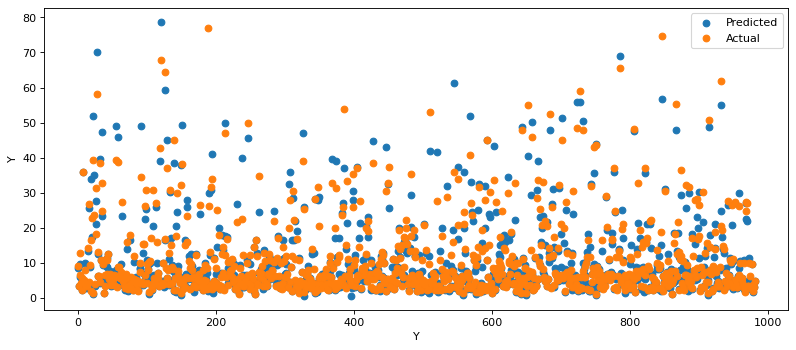

In [134]:
from matplotlib.pyplot import figure
num=[]
for i in range(X_test.shape[0]):
    num.append(i+1)
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(num,y_test,label="Predicted")
plt.scatter(num,y_pred,label="Actual")
plt.legend()
plt.xlabel("Y")
plt.ylabel("Y")